# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
**Reputation costs** *estimated* per order with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We will assume that we have an estimate measure of the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that has ever join the platform, as well as the square root of the total cumulated number of items that were ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both number of sellers to manage and sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.  
- The latter being outside of Olist's direct control, improving it is not a quick-win recommendation
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments of the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below  
💪 But feel free to investigate into other hypothesis instead with part 3

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worse sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` it brings
- the `review_costs` associated with all its bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need


⚠️ Don't start from scratch, update your existing package 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Create a method that will help us update the IT Costs after removing sellers along with the items they sold

2️⃣ Sort sellers by increasing profits

3️⃣ Remove sellers one by one, starting from the one with the lowest profit.
- For each number of sellers to remove, compute the financial impact on Olist global profits.

4️⃣ Find an optimal number of sellers to remove that maximizes either Olist's profit margin or profit.

## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after it has a honeymoon period of few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪

# Análise de Desempenho dos Vendedores da Olist

## Introdução

### Premissas: Variação no Custo de TI após remoção de Vendedores foi insignificante


### Neste notebook, vamos analisar como a Olist pode melhorar seu lucro. Analisaremos de vendas de maneira a encontrar possíveis causas que impendem um resultado financeiro superior

## Preparação dos Dados

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.data import Olist
from olist.order import Order

In [8]:

olist = Olist()
orders = olist.get_data()['orders']
order_items = olist.get_data()['order_items']
order_reviews = olist.get_data()['order_reviews']
sellers = olist.get_data()['sellers']
products = olist.get_data()['products']

In [38]:
total_company_revenue = company_revenue_per_seller['company_revenue'].sum()

total_review_cost = cost_per_seller['total_negative_review_cost'].sum()


total_profit = total_company_revenue - total_review_cost

print(f"Receita Total da Empresa: R${total_company_revenue:.2f}")
print(f"Custo Total dos Reviews Ruins: R${total_review_cost:.2f}")
print(f"Lucro Total da Empresa: R${total_profit:.2f}")

Receita Total da Empresa: R$2785818.44
Custo Total dos Reviews Ruins: R$1994120.00
Lucro Total da Empresa: R$791698.44


In [64]:
high_loss_seller_ids = high_loss_makers_sorted['seller_id'].tolist()

filtered_revenue = company_revenue_per_seller[~company_revenue_per_seller['seller_id'].isin(high_loss_seller_ids)]
filtered_cost = cost_per_seller[~cost_per_seller['seller_id'].isin(high_loss_seller_ids)]

new_total_company_revenue = filtered_revenue['company_revenue'].sum()

new_total_review_cost = filtered_cost['total_negative_review_cost'].sum()

new_total_profit = new_total_company_revenue - new_total_review_cost

print(f"Receita Total da Empresa (após remoção): R${new_total_company_revenue:.2f}")
print(f"Custo Total dos Reviews Ruins (após remoção): R${new_total_review_cost:.2f}")
print(f"Lucro Total da Empresa (após remoção): R${new_total_profit:.2f}")

Receita Total da Empresa (após remoção): R$2200553.62
Custo Total dos Reviews Ruins (após remoção): R$888340.00
Lucro Total da Empresa (após remoção): R$1312213.62


## Apresentação do Resultado - Remoção dos Piores Vendedores

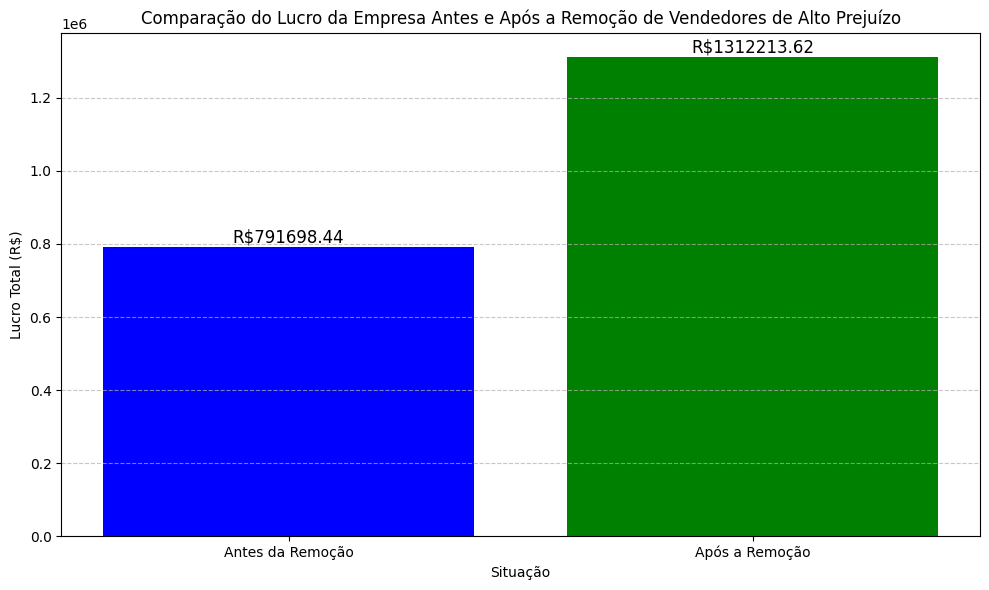

In [75]:
original_total_profit = total_company_revenue - cost_per_seller['total_negative_review_cost'].sum()

new_total_profit = new_total_company_revenue - new_total_review_cost

profits = {
    'Antes da Remoção': original_total_profit,
    'Após a Remoção': new_total_profit
}

plt.figure(figsize=(10, 6))
plt.bar(profits.keys(), profits.values(), color=['blue', 'green'])
plt.xlabel('Situação')
plt.ylabel('Lucro Total (R$)')
plt.title('Comparação do Lucro da Empresa Antes e Após a Remoção de Vendedores de Alto Prejuízo')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adicionar rótulos no topo das barras
for i, (label, value) in enumerate(profits.items()):
    plt.text(i, value + 1000, f'R${value:.2f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

### Tabelas

In [9]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [10]:
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [11]:
order_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [12]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
class Seller:
    def __init__(self):
        # Import data only once
        olist = Olist()
        self.data = olist.get_data()
        self.order = Order()

    def get_seller_features(self):
        sellers = self.data['sellers'].copy()
        sellers.drop('seller_zip_code_prefix', axis=1, inplace=True)
        sellers.drop_duplicates(inplace=True)
        return sellers

    def get_seller_delay_wait_time(self):
        order_items = self.data['order_items'].copy()
        orders = self.data['orders'].query("order_status=='delivered'").copy()

        ship = order_items.merge(orders, on='order_id')

        ship.loc[:, 'shipping_limit_date'] = pd.to_datetime(ship['shipping_limit_date'])
        ship.loc[:, 'order_delivered_carrier_date'] = pd.to_datetime(ship['order_delivered_carrier_date'])
        ship.loc[:, 'order_delivered_customer_date'] = pd.to_datetime(ship['order_delivered_customer_date'])
        ship.loc[:, 'order_purchase_timestamp'] = pd.to_datetime(ship['order_purchase_timestamp'])

        def delay_to_logistic_partner(d):
            days = np.mean((d.order_delivered_carrier_date - d.shipping_limit_date) / np.timedelta64(24, 'h'))
            return max(days, 0)

        def order_wait_time(d):
            return np.mean((d.order_delivered_customer_date - d.order_purchase_timestamp) / np.timedelta64(24, 'h'))

        delay = ship.groupby('seller_id').apply(delay_to_logistic_partner).reset_index()
        delay.columns = ['seller_id', 'delay_to_carrier']

        wait = ship.groupby('seller_id').apply(order_wait_time).reset_index()
        wait.columns = ['seller_id', 'wait_time']

        df = delay.merge(wait, on='seller_id')
        return df

    def get_active_dates(self):
        orders_approved = self.data['orders'][['order_id', 'order_approved_at']].dropna()
        orders_sellers = orders_approved.merge(self.data['order_items'], on='order_id')[['order_id', 'seller_id', 'order_approved_at']].drop_duplicates()
        orders_sellers["order_approved_at"] = pd.to_datetime(orders_sellers["order_approved_at"])

        orders_sellers["date_first_sale"] = orders_sellers["order_approved_at"]
        orders_sellers["date_last_sale"] = orders_sellers["order_approved_at"]
        df = orders_sellers.groupby('seller_id').agg({"date_first_sale": min, "date_last_sale": max})
        df['months_on_olist'] = round((df['date_last_sale'] - df['date_first_sale']) / np.timedelta64(1, 'M'))
        return df

    def get_quantity(self):
        order_items = self.data['order_items']
        n_orders = order_items.groupby('seller_id')['order_id'].nunique().reset_index()
        n_orders.columns = ['seller_id', 'n_orders']

        quantity = order_items.groupby('seller_id', as_index=False).agg({'order_id': 'count'})
        quantity.columns = ['seller_id', 'quantity']

        result = n_orders.merge(quantity, on='seller_id')
        result['quantity_per_order'] = result['quantity'] / result['n_orders']
        return result

    def get_sales(self):
        return self.data['order_items'][['seller_id', 'price']].groupby('seller_id').sum().rename(columns={'price': 'sales'})

    def get_review_score(self):
        reviews = self.data['order_reviews']
        order_items = self.data['order_items']

        reviews_count = order_items.merge(reviews, on='order_id').groupby('seller_id')['review_score'].count().reset_index()
        reviews_count.columns = ['seller_id', 'total_reviews']

        five_star_reviews = order_items.merge(reviews[reviews['review_score'] == 5], on='order_id').groupby('seller_id')['review_score'].count().reset_index()
        five_star_reviews.columns = ['seller_id', 'five_star_reviews']

        one_star_reviews = order_items.merge(reviews[reviews['review_score'] == 1], on='order_id').groupby('seller_id')['review_score'].count().reset_index()
        one_star_reviews.columns = ['seller_id', 'one_star_reviews']

        review_summary = reviews_count.merge(five_star_reviews, on='seller_id', how='left').merge(one_star_reviews, on='seller_id', how='left')
        review_summary.fillna(0, inplace=True)
        review_summary['share_of_five_stars'] = review_summary['five_star_reviews'] / review_summary['total_reviews']
        review_summary['share_of_one_stars'] = review_summary['one_star_reviews'] / review_summary['total_reviews']

        average_review_score = order_items.merge(reviews, on='order_id').groupby('seller_id')['review_score'].mean().reset_index()
        average_review_score.columns = ['seller_id', 'review_score']

        review_summary = review_summary.merge(average_review_score, on='seller_id')
        return review_summary[['seller_id', 'share_of_five_stars', 'share_of_one_stars', 'review_score']]

    def get_training_data(self):
        training_set = self.get_seller_features().merge(
            self.get_seller_delay_wait_time(), on='seller_id'
        ).merge(
            self.get_active_dates(), on='seller_id'
        ).merge(
            self.get_quantity(), on='seller_id'
        ).merge(
            self.get_sales(), on='seller_id'
        )

        if self.get_review_score() is not None:
            training_set = training_set.merge(self.get_review_score(), on='seller_id')

        return training_set

# Crie uma instância da classe Seller
seller_instance = Seller()

# Obtenha o DataFrame com os dados de treinamento
seller = seller_instance.get_training_data()

seller


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_five_stars,share_of_one_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,0.333333,0.333333,3.000000
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,0.731707,0.048780,4.560976
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,1.000000,0.000000,5.000000
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,1.000000,0.000000,5.000000
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,0.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,1.000000,0.000000,5.000000
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,0.500000,0.100000,4.100000
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,1.000000,0.000000,5.000000
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,0.636364,0.000000,4.454545


In [14]:
populacao_estados = {
    'AC': 906876,   # Acre
    'AL': 3351543,  # Alagoas
    'AP': 877613,   # Amapá
    'AM': 4207714,  # Amazonas
    'BA': 14930634, # Bahia
    'CE': 9187103,  # Ceará
    'DF': 3094325,  # Distrito Federal
    'ES': 4064052,  # Espírito Santo
    'GO': 7206589,  # Goiás
    'MA': 7153262,  # Maranhão
    'MT': 3567234,  # Mato Grosso
    'MS': 2839188,  # Mato Grosso do Sul
    'MG': 21411923, # Minas Gerais
    'PA': 8777124,  # Pará
    'PB': 4039277,  # Paraíba
    'PR': 11516840, # Paraná
    'PE': 9674793,  # Pernambuco
    'PI': 3281480,  # Piauí
    'RJ': 17366189, # Rio de Janeiro
    'RN': 3534165,  # Rio Grande do Norte
    'RS': 11422973, # Rio Grande do Sul
    'RO': 1815278,  # Rondônia
    'RR': 652713,   # Roraima
    'SC': 7338473,  # Santa Catarina
    'SP': 46649132, # São Paulo
    'SE': 2338474,  # Sergipe
    'TO': 1607363   # Tocantins
}

## Custo dos Reviews

### Vendedores com maior quantidade de reviews abaixo de 5

In [41]:

merged_df = order_items.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')


negative_reviews_df = merged_df[merged_df['review_score'] < 5]


negative_reviews_count = negative_reviews_df.groupby('seller_id').size().reset_index(name='negative_review_count')

negative_reviews_count

,seller_id,negative_review_count
0,0015a82c2db000af6aaaf3ae2ecb0532,1
1,001cca7ae9ae17fb1caed9dfb1094831,115
2,001e6ad469a905060d959994f1b41e4f,1
3,002100f778ceb8431b7a1020ff7ab48f,25
4,004c9cd9d87a3c30c522c48c4fc07416,69
...,...,...
2578,ffcfefa19b08742c5d315f2791395ee5,1
2579,ffdd9f82b9a447f6f8d4b91554cc7dd3,7
2580,ffeee66ac5d5a62fe688b9d26f83f534,5
2581,fffd5413c0700ac820c7069d66d98c89,27


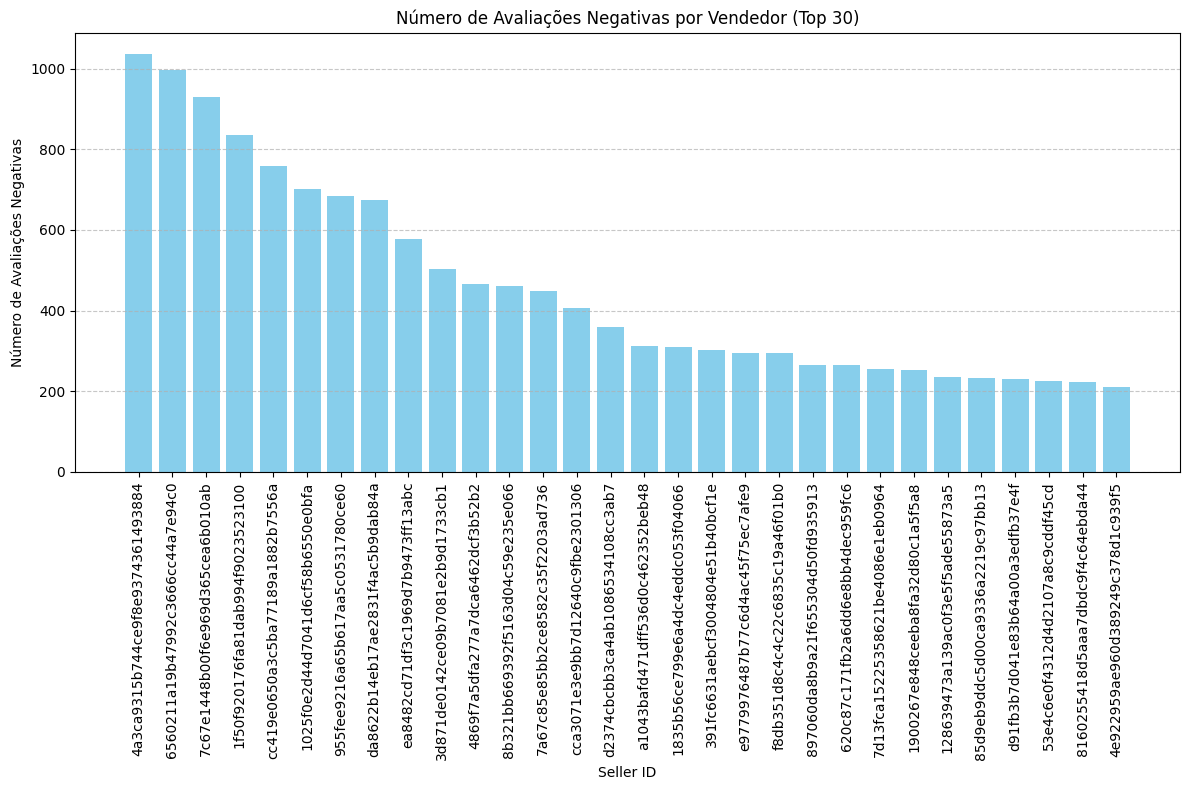

In [45]:
negative_reviews_count_sorted = negative_reviews_count.sort_values(by='negative_review_count', ascending=False)


top_30_sellers = negative_reviews_count_sorted.head(30)

plt.figure(figsize=(12, 8))
plt.bar(top_30_sellers['seller_id'], top_30_sellers['negative_review_count'], color='skyblue')
plt.xlabel('Seller ID')
plt.ylabel('Número de Avaliações Negativas')
plt.title('Número de Avaliações Negativas por Vendedor (Top 30)')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Parâmetros de custo de revisão

In [16]:
review_cost = {
    1: 100,
    2: 50,
    3: 40,
    4: 0,
    5: 0
}

## Vendedores que geram custos

In [19]:
def calculate_revenue_for_company(order_items, seller_data):
    sales_fee = 0.10
    subscription_fee_per_month = 80
    

    revenue_per_seller = order_items.groupby('seller_id').agg(
        total_revenue=('price', 'sum')
    ).reset_index()
    

    revenue_per_seller = revenue_per_seller.merge(seller_data[['seller_id', 'months_on_olist']], on='seller_id', how='left')

    revenue_per_seller['subscription_revenue'] = revenue_per_seller['months_on_olist'] * subscription_fee_per_month
    

    revenue_per_seller['company_revenue'] = revenue_per_seller['total_revenue'] * sales_fee + revenue_per_seller['subscription_revenue']
    

    revenue_per_seller.dropna(inplace=True)
    
    return revenue_per_seller

company_revenue_per_seller = calculate_revenue_for_company(order_items, seller)
company_revenue_per_seller


,seller_id,total_revenue,months_on_olist,subscription_revenue,company_revenue
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,1.0,80.0,348.500
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,17.0,1360.0,3868.003
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,7.0,560.0,683.450
4,003554e2dce176b5555353e4f3555ac8,120.00,0.0,0.0,12.000
5,004c9cd9d87a3c30c522c48c4fc07416,19712.71,15.0,1200.0,3171.271
...,...,...,...,...,...
3089,ffc470761de7d0232558ba5e786e57b7,1649.01,6.0,480.0,644.901
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,2101.20,18.0,1440.0,1650.120
3092,ffeee66ac5d5a62fe688b9d26f83f534,1839.86,7.0,560.0,743.986
3093,fffd5413c0700ac820c7069d66d98c89,9062.30,13.0,1040.0,1946.230


In [20]:
total_company_revenue = company_revenue_per_seller['company_revenue'].sum()
total_company_revenue

2785818.444

In [80]:
def find_loss_makers(order_items, order_reviews):

    negative_review_cost = calculate_negative_review_cost(order_reviews)
    company_revenue = calculate_revenue_for_company(order_items)

    seller_costs_revenues = pd.merge(negative_review_cost, company_revenue[['seller_id', 'company_revenue']], on='seller_id', how='left')

    seller_costs_revenues['is_loss_maker'] = seller_costs_revenues['total_negative_review_cost'] > seller_costs_revenues['company_revenue']

    loss_makers = seller_costs_revenues[seller_costs_revenues['is_loss_maker']]
    return loss_makers


In [56]:

revenue_cost_df = company_revenue_per_seller.merge(cost_per_seller, on='seller_id', how='left')

revenue_cost_df['total_negative_review_cost'].fillna(0, inplace=True)

revenue_cost_df['is_loss_maker'] = revenue_cost_df['total_negative_review_cost'] > revenue_cost_df['company_revenue']

loss_makers = revenue_cost_df[revenue_cost_df['is_loss_maker']]
loss_makers[['seller_id', 'company_revenue', 'total_negative_review_cost']]

,seller_id,company_revenue,total_negative_review_cost
1,001cca7ae9ae17fb1caed9dfb1094831,3868.003,4750.0
2,002100f778ceb8431b7a1020ff7ab48f,683.450,1110.0
5,00720abe85ba0859807595bbf045a33b,580.750,680.0
9,00fc707aaaad2d31347cf883cd2dfe10,1588.490,3440.0
11,010da0602d7774602cd1b3f5fb7b709e,84.950,500.0
...,...,...,...
2910,fb3cfbc8a86f5d7fbb4d36b8df63f60d,260.730,640.0
2920,fc6295add6f51a0936407ead70c1001d,16.000,400.0
2925,fcdd820084f17e9982427971e4e9d47f,878.399,1050.0
2929,fd386aa7bed2af3c7035c65506c9b4a3,710.415,930.0


In [57]:
loss_makers['total_loss'] = loss_makers['total_negative_review_cost'] - loss_makers['company_revenue']


total_loss_amount = loss_makers['total_loss'].sum()

print(f'O valor total dos prejuízos dos vendedores que geram prejuízo é: R$ {total_loss_amount:.2f}')

O valor total dos prejuízos dos vendedores que geram prejuízo é: R$ 530990.16


/tmp/ipykernel_609924/3123139843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss_makers['total_loss'] = loss_makers['total_negative_review_cost'] - loss_makers['company_revenue']


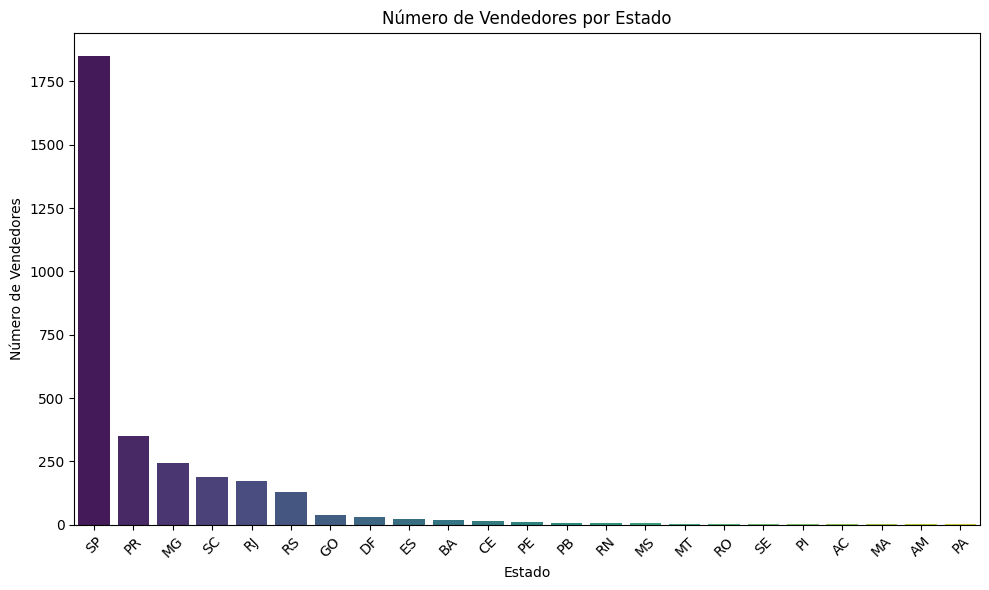

In [58]:

seller_counts = sellers['seller_state'].value_counts().reset_index()
seller_counts.columns = ['seller_state', 'number_of_sellers']

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_state', y='number_of_sellers', data=seller_counts, palette='viridis')
plt.title('Número de Vendedores por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Vendedores')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

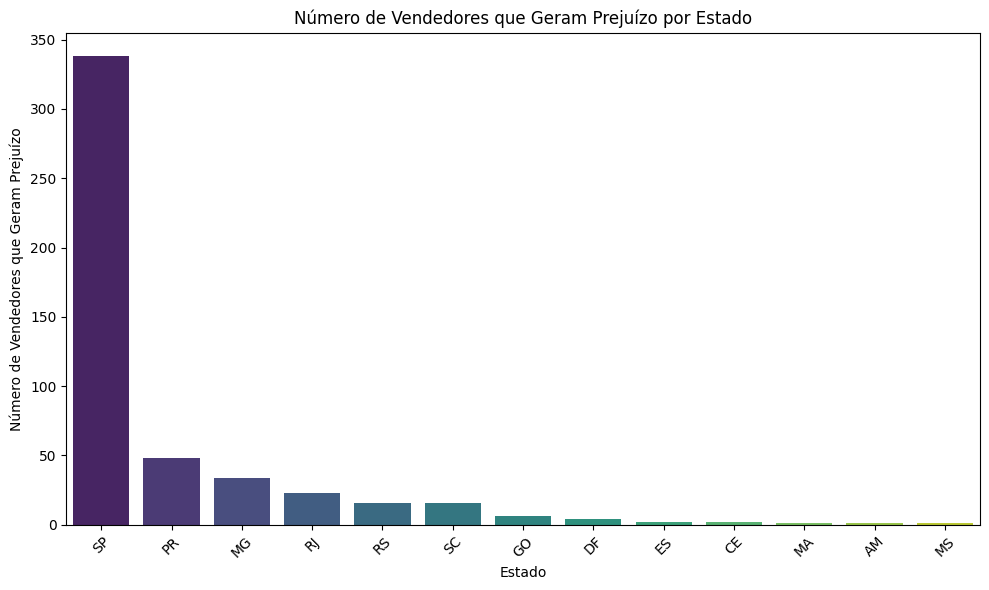

In [59]:
# Dados dos vendedores com a tabela de estados
loss_makers_with_states = pd.merge(loss_makers, sellers[['seller_id', 'seller_state']], on='seller_id', how='left')

# Contar o número de vendedores que geram prejuízo por estado
loss_makers_by_state = loss_makers_with_states['seller_state'].value_counts().reset_index()
loss_makers_by_state.columns = ['seller_state', 'count']

plt.figure(figsize=(10, 6))
sns.barplot(x='seller_state', y='count', data=loss_makers_by_state, palette='viridis')
plt.xlabel('Estado')
plt.ylabel('Número de Vendedores que Geram Prejuízo')
plt.title('Número de Vendedores que Geram Prejuízo por Estado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:

high_loss_makers = loss_makers[loss_makers['total_negative_review_cost'] > (loss_makers['company_revenue'] + 100)]

high_loss_makers_sorted = high_loss_makers.sort_values(by='total_negative_review_cost', ascending=False)
high_loss_makers_sorted

,seller_id,total_revenue,months_on_olist,subscription_revenue,company_revenue,total_negative_review_cost,is_loss_maker,total_loss
857,4a3ca9315b744ce9f8e9374361493884,200472.92,20.0,1600.0,21647.292,44620.0,True,22972.708
1479,7c67e1448b00f6e969d365cea6b010ab,187923.89,18.0,1440.0,20232.389,44290.0,True,24057.611
1189,6560211a19b47992c3666cc44a7e94c0,123304.83,18.0,1440.0,13770.483,40120.0,True,26349.517
358,1f50f920176fa81dab994f9023523100,106939.21,17.0,1360.0,12053.921,37490.0,True,25436.079
188,1025f0e2d44d7041d6cf58b6550e0bfa,138968.55,14.0,1120.0,15016.855,31290.0,True,16273.145
...,...,...,...,...,...,...,...,...
2513,d8dd176509baa37f359644d082bf7f7b,198.00,0.0,0.0,19.800,150.0,True,130.200
513,2cb4700db635baa1c0d4f90ed27b6669,199.80,0.0,0.0,19.980,140.0,True,120.020
975,52f6f9f13ba19504c02781132a049e75,199.00,0.0,0.0,19.900,140.0,True,120.100
1408,76d336555bb25f3165d2f0d6da719c40,330.00,0.0,0.0,33.000,140.0,True,107.000


In [61]:
total_loss = high_loss_makers_sorted['total_loss'].sum()
total_loss

520515.176

## Vendas por Categoria

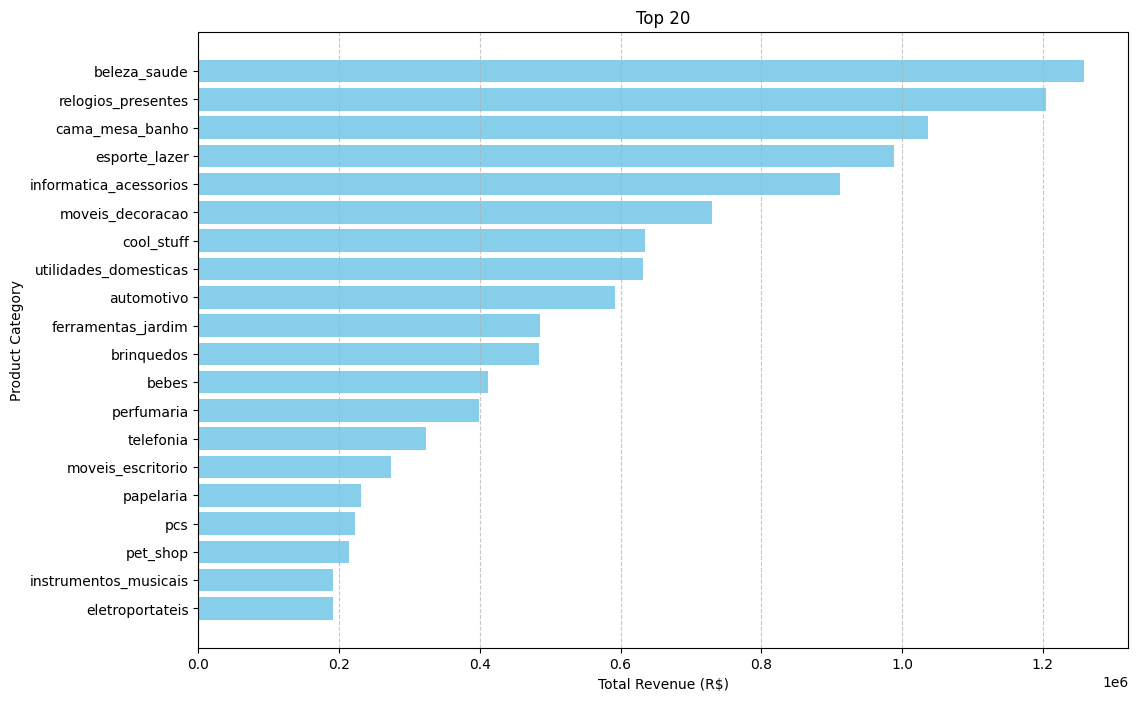

In [76]:
order_items_products = order_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

revenue_by_category = order_items_products.groupby('product_category_name').agg(
    total_revenue=('price', 'sum')
).reset_index()

revenue_by_category_sorted = revenue_by_category.sort_values(by='total_revenue', ascending=False)

top_20_revenue_categories = revenue_by_category_sorted.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_revenue_categories['product_category_name'], top_20_revenue_categories['total_revenue'], color='skyblue')
plt.xlabel('Total Revenue (R$)')
plt.ylabel('Product Category')
plt.title('Top 20')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

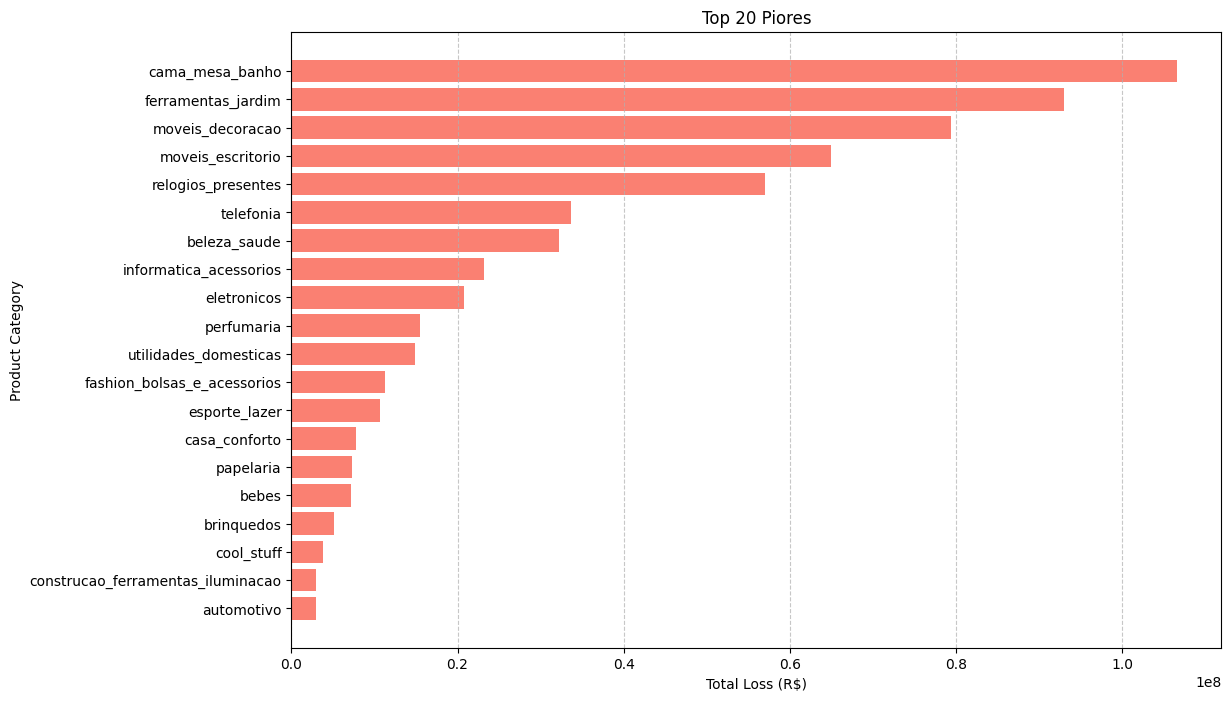

In [77]:
loss_makers_orders = high_loss_makers_sorted.merge(order_items[['order_id', 'seller_id']], on='seller_id', how='left')

loss_makers_orders_items = loss_makers_orders.merge(order_items[['order_id', 'product_id']], on='order_id', how='left')

loss_makers_orders_products = loss_makers_orders_items.merge(products[['product_id', 'product_category_name']], on='product_id', how='left')

loss_by_category = loss_makers_orders_products.groupby('product_category_name').agg(
    total_loss=('total_loss', 'sum')
).reset_index()

loss_by_category_sorted = loss_by_category.sort_values(by='total_loss', ascending=False)

top_20_loss_categories = loss_by_category_sorted.head(20)

plt.figure(figsize=(12, 8))
plt.barh(top_20_loss_categories['product_category_name'], top_20_loss_categories['total_loss'], color='salmon')
plt.xlabel('Total Loss (R$)')
plt.ylabel('Product Category')
plt.title('Top 20 Piores')
plt.gca().invert_yaxis()  # Inverter o eixo y para que a maior perda apareça no topo
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Análise de Custos Operacionais de TI

Calcular os custos operacionais com base no número de vendedores e itens vendidos.

In [52]:
num_sellers = seller['seller_id'].nunique() 
num_items = seller['n_orders'].sum() 

In [51]:
# Parâmetros de custo de TI
alpha = 3157.27
beta = 978.23

# Função para calcular o custo de TI
def calculate_it_costs(sellers, order_items):
    num_sellers = seller['seller_id'].nunique() 
    num_items = seller['n_orders'].sum()
    it_cost = alpha * np.sqrt(num_sellers) + beta * np.sqrt(num_items)
    return it_cost

# Custo de TI com todos os vendedores
it_costs_all_sellers = calculate_it_costs(seller, order_items)

# Vendedores com prejuízo superior a 100 reais
high_loss_makers = loss_makers[loss_makers['total_loss'] > 100]['seller_id'].unique()

# Tabela de vendedores removendo os vendedores com prejuízo
filtered_sellers = sellers[~sellers['seller_id'].isin(high_loss_makers)]

# Tabela de itens de pedido e removendo itens dos vendedores com prejuízo
filtered_order_items = order_items[~order_items['seller_id'].isin(high_loss_makers)]

# Custo de TI com os vendedores restantes
it_costs_filtered_sellers = calculate_it_costs(filtered_sellers, filtered_order_items)

# Resultados
print(f'Custo total de TI com todos os vendedores: {it_costs_all_sellers:.2f} BRL')
print(f'Custo total de TI após remover vendedores com prejuízo superior a 100 reais: {it_costs_filtered_sellers:.2f} BRL')

Custo total de TI com todos os vendedores: 481074.51 BRL
Custo total de TI após remover vendedores com prejuízo superior a 100 reais: 481074.51 BRL


In [ ]:
filtered_sellers

In [67]:
state_summary = seller.groupby('seller_state').agg(
    total_orders=('n_orders', 'sum'),
    total_sales=('sales', 'sum')
).reset_index()

state_summary

,seller_state,total_orders,total_sales
0,AM,3,1177.00
1,BA,568,285494.06
2,CE,90,20175.74
3,DF,824,97749.48
4,ES,315,47534.64
5,GO,462,66164.21
6,MA,392,36408.95
7,MG,7930,1008983.10
8,MS,49,8551.69
9,MT,137,17070.72


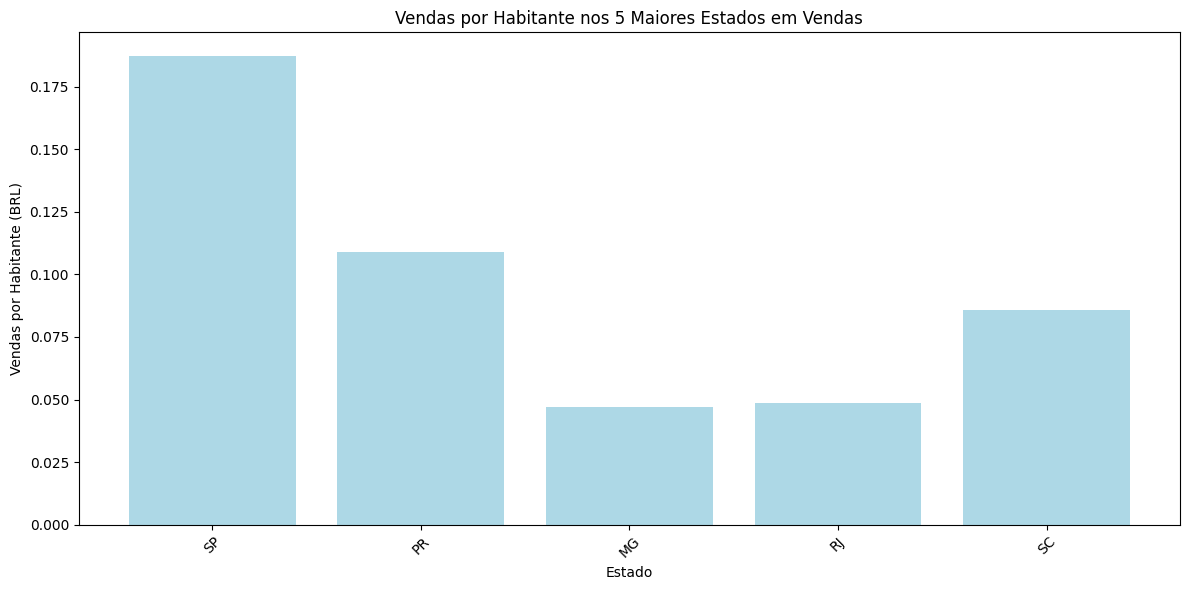

In [78]:
state_summary = seller.groupby('seller_state').agg(
    total_orders=('n_orders', 'sum'),
    total_sales=('sales', 'sum')
).reset_index()

top_5_states_sales['population'] = top_5_states_sales['seller_state'].map(populacao_estados)

# Calcular a população dividida por mil
top_5_states_sales['population_per_thousand'] = top_5_states_sales['population'] / 1000

# Calcular vendas por habitante
top_5_states_sales['sales_per_person'] = top_5_states_sales['total_sales'] / top_5_states_sales['population']

# Plotar gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(top_5_states_sales['seller_state'], top_5_states_sales['sales_per_person'], color='lightblue')

plt.title('Vendas por Habitante nos 5 Maiores Estados em Vendas')
plt.xlabel('Estado')
plt.ylabel('Vendas por Habitante (BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Recomendações

### Remoção imediata de vendedores com péssimos Reviews
### Revisão de fornecedores para as categorias:
#### -Cama, Mesa e Banho
#### -Móveis
#### -Jardim
#### -Relógios
### Fortalecimento do ticket médio nos estados de PR, MG e RJ